##  Seismische Wellen an einer Grenzfläche

Das folgende Skript zeigt das Verhalten einer P-Welle, die in einem bestimmten Winkel auf eine Grenzfläche zwischen zwei Gesteinen mit unterschiedlichen Geschwindigkeiten trifft. 
Fügen Sie die entsprechenden Geschwindigkeiten und den Einfallswinkel in das Notebook ein und speichern Sie die resultierende Abbildung (Rechtsklick auf die Abbildung -> Grafik speichern unter). 
Beschriften Sie anschließend alle Strahlen. 

**Achtung:** x- und y-Achse sind hier aufgrund der besseren Darstellbarkeit nicht gleich skaliert !

5.773502691896257
[5.77350269 9.40711747 3.01511345 4.30727865]


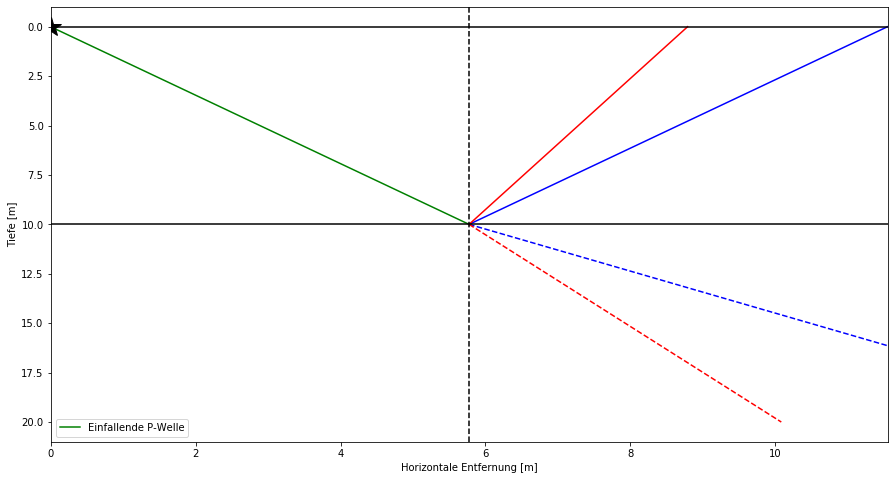

In [5]:
## Seismische Wellen an einer Grenzfläche
import numpy as np
import matplotlib.pyplot as plt

 
def get_all_alphas(alpha,d=10):
    if alpha[0] != 0:
        p = np.sin(alpha[0])/v[0]
    else:
        p = np.sin(alpha[2])/v[2]
    alpha[:] = np.arcsin(p*v[:])
    x = np.tan(alpha)*d
    return x

#--------------------- Fügen Sie hier ihre Werte ein   --------------------------------------------


Winkel=30  #Winkel zwischen Strahl und LOt auf die Grenzfläche

v1=2700  # Geschwindigkeit der ersten Schicht in m/s

v2=3700  # Geschwindigkeit der zweiten Schicht in m/s
 
if Winkel==0:
    print('Bitte Geben Sie einen Wert für "Winkel" und die Geschwindigkeiten ein!')
#---------------------   Ab hier nichts mehr verändern -------------------------------------------- 
vp = np.array([v1,v2])
vs = vp/np.sqrt(3)
alpha_in = np.deg2rad(Winkel)
z = np.array([0,10,20])
v = np.hstack((vp,vs))

alpha = np.zeros(4)

alpha[0] = alpha_in # Ursprüngliche Welle ist P-Welle
#alpha[2] = alpha_in # Ursprüngliche Welle ist S-Welle

x0 = np.tan(alpha_in)*(z[1]-z[0])

plt.figure(figsize=(15,8))
if alpha[0]!=0:
    plt.plot([0,x0],[z[0],z[1]],'g-',label = 'Einfallende P-Welle')
else:
    plt.plot([0,x0],[z[0],z[1]],'g-',label = 'Einfallende S-Welle')
    

x = get_all_alphas(alpha,z[2]-z[1])

plt.plot([x0,x0+x[0]],[z[1],z[0]],'b-') 
plt.plot([x0,x0+x[1]],[z[1],z[2]],'b--') 
plt.plot([x0,x0+x[2]],[z[1],z[0]],'r-') 
plt.plot([x0,x0+x[3]],[z[1],z[2]],'r--') 

plt.axvline(x0,Color='k',linestyle = '--')
plt.axhline(z[1],Color='k',linestyle='-')
plt.axhline(z[0],Color='k',linestyle='-')
plt.plot(0,0,'k*',MarkerSize=20)

plt.legend()
plt.xlim([0,2*x0])
plt.gca().invert_yaxis()
plt.xlabel('Horizontale Entfernung [m]')
plt.ylabel('Tiefe [m]')
#plt.grid('off')
#plt.axis('equal') 
plt.show()

